🔹 SVM Sentiment Classification Accuracy: 0.8724

🔹 Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.89      0.87      1058
     Neutral       0.88      0.90      0.89      1072
    Positive       0.89      0.84      0.86      1100

    accuracy                           0.87      3230
   macro avg       0.87      0.87      0.87      3230
weighted avg       0.87      0.87      0.87      3230



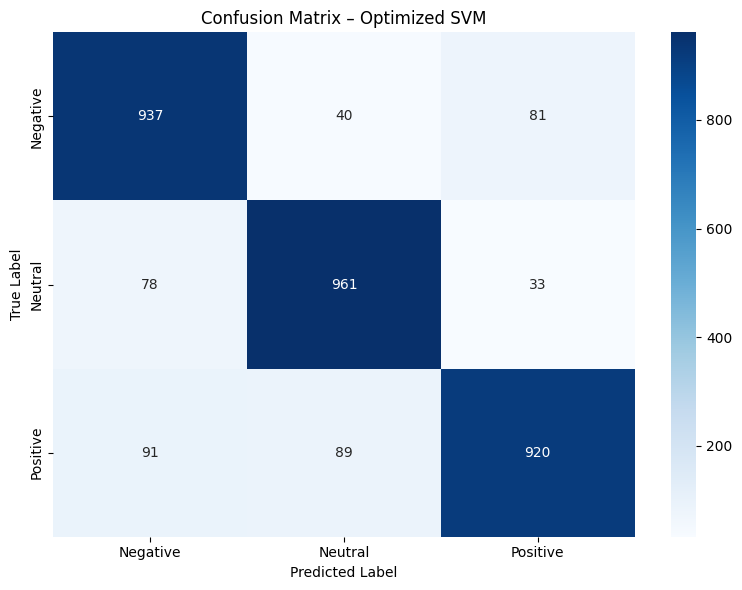

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dessertation/sentiment_results.csv", encoding="latin1")

# Ensure text column exists and handle missing values
# If 'processed_text' column doesn't exist, create it and fill NaN with empty strings
if 'processed_text' not in df.columns:
    df['processed_text'] = df['text'].fillna("")  # Use raw text if preprocessing was lost
# If 'processed_text' column exists, fill NaN with empty strings
else:
    df['processed_text'] = df['processed_text'].fillna("")

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_tfidf = vectorizer.fit_transform(df['processed_text'])

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment_label'] = df['sentiment_label'].fillna("Neutral")  # Handle missing labels
y_encoded = label_encoder.fit_transform(df['sentiment_label'])

# Apply SMOTE to balance sentiment classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier
# Train SVM with optimized parameters
svm_model = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
#svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Display evaluation results
print(f"🔹 SVM Sentiment Classification Accuracy: {svm_accuracy:.4f}")
print("\n🔹 Classification Report:\n", svm_report)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix – Optimized SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()